In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os

import numpy as np
import sbi.simulators as simulators
import sbi.utils as utils
import torch
from sbi.inference.snpe.snpe_c import APT
from sbi.inference.snpe.snpe_b import SNPE_B
from torch import distributions

# use cpu by default
torch.set_default_tensor_type("torch.FloatTensor")

# seed the simulations
torch.manual_seed(0)

In [ ]:
a = 

In [3]:
simulator = simulators.TwoMoonsSimulator()
a = 1
parameter_dim, observation_dim = 2, 2
prior = distributions.Uniform(
    low=-a * torch.ones(parameter_dim), high=a * torch.ones(parameter_dim),
)

true_observation = torch.Tensor([0, 0])

In [4]:
snpe_b = SNPE_B(
    simulator=simulator,
    true_observation=true_observation,
    prior=prior,
    use_combined_loss=False,
    density_estimator="maf",
    z_score_obs=True,
    train_with_mcmc=False,
    mcmc_method="slice-np",
    summary_net=None,
    retrain_from_scratch_each_round=False,
    discard_prior_samples=False,
)

/Users/deismic/Documents/PhD/pyknos/pyknos/transforms/standard.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "_shift", torch.tensor(shift if (shift is not None) else 0.0)
/Users/deismic/Documents/PhD/pyknos/pyknos/transforms/standard.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "_scale", torch.tensor(scale if (scale is not None) else 1.0)


In [5]:
num_rounds, num_simulations_per_round = 2, 500
snpe_b.run_inference(
    num_rounds=num_rounds,
    num_simulations_per_round=num_simulations_per_round,
    batch_size=20,
)

  0%|          | 0/2 [00:00<?, ?it/s]/Users/deismic/anaconda3/envs/sbi/lib/python3.8/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch


-------------------------16<01:16, 76.43s/it]
||||| ROUND 1 STATS |||||:
-------------------------
Epochs trained: 155
Best validation performance: 1.4675

:  50%|█████     | 1/2 [01:16<01:16, 76.43s/it]

new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch


-------------------------
||||| ROUND 1 STATS |||||:
-------------------------
Epochs trained: 155
Best validation performance: 1.4675

-------------------------2:48<00:00, 81.25s/it]
||||| ROUND 1 STATS |||||:
-------------------------
Epochs trained: 155
Best validation performance: 1.4675

: 100%|██████████| 2/2 [02:48<00:00, 84.47s/it]


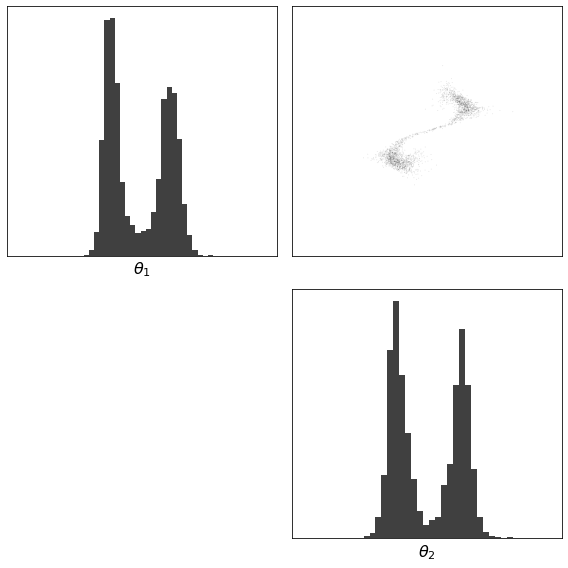

In [7]:
samples = snpe_b.sample(2500)
samples = utils.tensor2numpy(samples)
figure = utils.plot_hist_marginals(
    data=samples,
    lims=[-1, 1],
)